In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

<font size = 6>Sampling

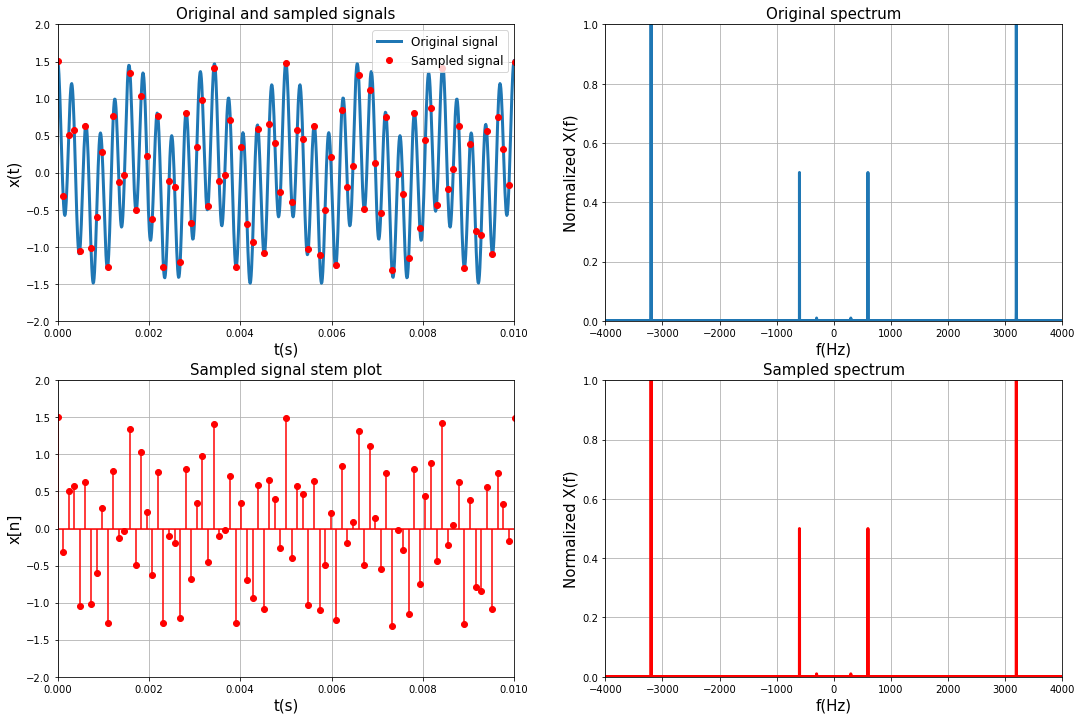

In [198]:
t = np.linspace(0, 1, 100000)   #Time span
xt = np.cos(2*np.pi*3200*t) + 0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)    #Original signal
Fs = 8192   #By Nyquist-Shannon theorem, Fs > 2*3200 = 6400, hence 8192 that is the closest power of 2 greater than 6400
n = np.arange(0, 1, 1/Fs)   #Sampling points
xn = np.cos(2*np.pi*3200*n) + 0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)    #Sampled signal

To = t[1] - t[0]    #Original Period
os = abs(fft(xt))   #Original Spectrum
of = fftfreq(len(xt), To)    #Frequency span

Ts = 1/Fs    #Sampled Period
ss = abs(fft(xn))   #Sampled spectrum
sf = fftfreq(len(xn), Ts)   #Frequency span

figure1, ax1 = plt.subplots(2, 2, figsize = (18, 12))

ax1[0][0].plot(t, xt, linewidth = 3, label = 'Original signal')
ax1[0][0].plot(n, xn, 'o', color = 'r', label = 'Sampled signal')
ax1[0][0].set_xlim(0, 0.01)
ax1[0][0].set_ylim(-2, 2)
ax1[0][0].set_xlabel('t(s)', fontsize = 15)
ax1[0][0].set_ylabel('x(t)', fontsize = 15)
ax1[0][0].set_title('Original and sampled signals', fontsize = 15)
ax1[0][0].legend(fontsize = 12, loc = 'upper right')
ax1[0][0].grid(True)

ax1[0][1].plot(of, (os/os.max()), linewidth = 3)  
ax1[0][1].set_xlim(-4000, 4000)
ax1[0][1].set_ylim(0, 1)
ax1[0][1].set_xlabel('f(Hz)', fontsize = 15)
ax1[0][1].set_ylabel('Normalized X(f)', fontsize = 15)
ax1[0][1].set_title('Original spectrum', fontsize = 15)
ax1[0][1].grid(True)

markerline, stemline, baseline = ax1[1][0].stem(n, xn, 'r')
baseline.set_color('r')
markerline.set_color('r')
ax1[1][0].set_xlim(0, 0.01)
ax1[1][0].set_ylim(-2, 2)
ax1[1][0].set_xlabel('t(s)', fontsize = 15)
ax1[1][0].set_ylabel('x[n]', fontsize = 15)
ax1[1][0].set_title('Sampled signal stem plot', fontsize = 15)
ax1[1][0].grid(True)

ax1[1][1].plot(sf, (ss/ss.max()), 'r', linewidth = 3)  
ax1[1][1].set_xlim(-4000, 4000)
ax1[1][1].set_ylim(0, 1)
ax1[1][1].set_xlabel('f(Hz)', fontsize = 15)
ax1[1][1].set_ylabel('Normalized X(f)', fontsize = 15)
ax1[1][1].set_title('Sampled spectrum', fontsize = 15)
ax1[1][1].grid(True)

<font size = 6>Signal retrieval

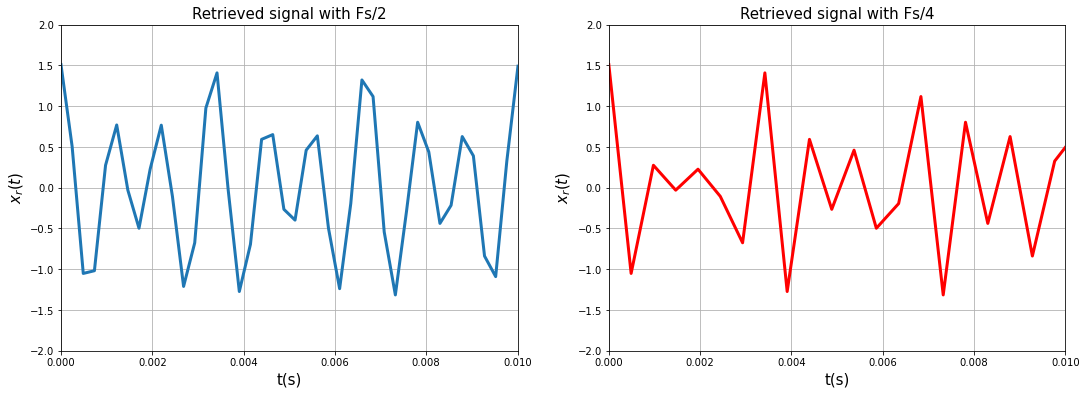

In [199]:
Fs2 = Fs/2  #Half sampling frequency
n2 = np.arange(0, 1, 1/Fs2) #Sampling points for Fs/2
xn2 = np.cos(2*np.pi*3200*n2) + 0.5*np.cos(2*np.pi*600*n2) + 0.01*np.cos(2*np.pi*300*n2)    #Sampled signal for Fs/2
xr2 = np.zeros(len(n2))

for i in range(len(n2)):
    xr2 += xn2[i]*np.sinc((Fs2*n2 - i))

figure2, ax2 = plt.subplots(1, 2, figsize = (18,6))

ax2[0].plot(n2, xr2, linewidth = 3)
ax2[0].set_xlim(0, 0.01)
ax2[0].set_ylim(-2, 2)
ax2[0].set_xlabel('t(s)', fontsize = 15)
ax2[0].set_ylabel('$x_r(t)$', fontsize = 15)
ax2[0].set_title('Retrieved signal with Fs/2', fontsize = 15)
ax2[0].grid(True)

Fs4 = Fs/4  #Quarter sampling frequency
n4 = np.arange(0, 1, 1/Fs4) #Sampling points for Fs/4
xn4 = np.cos(2*np.pi*3200*n4) + 0.5*np.cos(2*np.pi*600*n4) + 0.01*np.cos(2*np.pi*300*n4)    #Sampled signal for Fs/4
xr4 = np.zeros(len(n4))

for i in range(len(n4)):
    xr4 += xn4[i]*np.sinc((Fs4*n4 - i))

ax2[1].plot(n4, xr4, 'r', linewidth = 3)
ax2[1].set_xlim(0, 0.01)
ax2[1].set_ylim(-2, 2)
ax2[1].set_xlabel('t(s)', fontsize = 15)
ax2[1].set_ylabel('$x_r(t)$', fontsize = 15)
ax2[1].set_title('Retrieved signal with Fs/4', fontsize = 15)
ax2[1].grid(True)

<font size = 6>Decimation

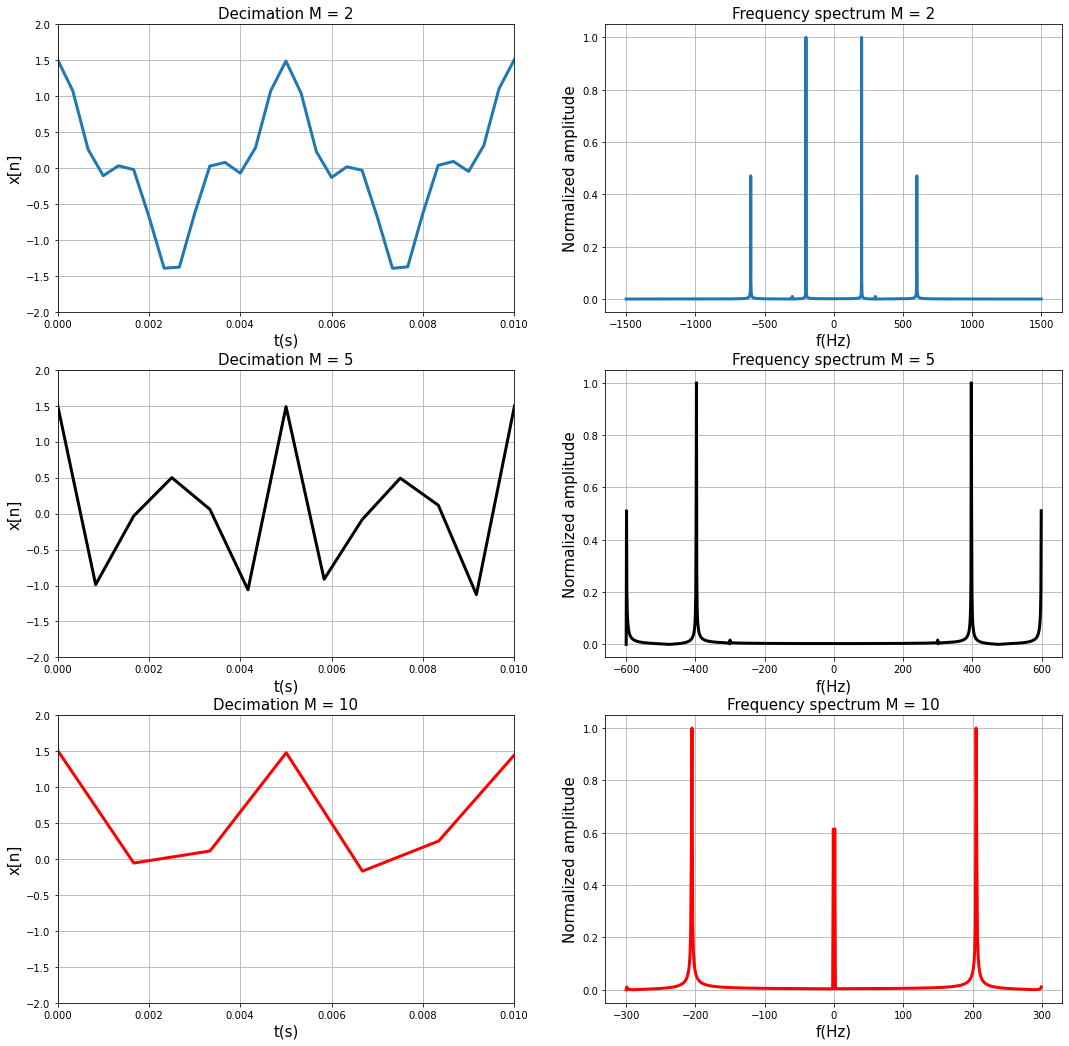

In [200]:
Fsd = 6000  #Sampling frequency for the decimation

Ts2 = 2/Fsd    #Sampled Period
nd2 = np.linspace(0, 1, Fsd//2)
xd2 = np.cos(2*np.pi*3200*nd2) + 0.5*np.cos(2*np.pi*600*nd2) + 0.01*np.cos(2*np.pi*300*nd2)
ssd2 = abs(fft(xd2))   #Sampled spectrum
sfd2 = fftfreq(len(xd2), Ts2)   #Frequency span

Ts5 = 5/Fsd    #Sampled Period
nd5 = np.linspace(0, 1, Fsd//5)
xd5 = np.cos(2*np.pi*3200*nd5) + 0.5*np.cos(2*np.pi*600*nd5) + 0.01*np.cos(2*np.pi*300*nd5)
ssd5 = abs(fft(xd5))   #Sampled spectrum
sfd5 = fftfreq(len(xd5), Ts5)   #Frequency span

Ts10 = 10/Fsd    #Sampled Period
nd10 = np.linspace(0, 1, Fsd//10)
xd10 = np.cos(2*np.pi*3200*nd10) + 0.5*np.cos(2*np.pi*600*nd10) + 0.01*np.cos(2*np.pi*300*nd10)
ssd10 = abs(fft(xd10))   #Sampled spectrum
sfd10 = fftfreq(len(xd10), Ts10)   #Frequency span

figure3, ax3 = plt.subplots(3, 2, figsize = (18,18))

ax3[0][0].plot(nd2, xd2, linewidth = 3)
ax3[0][0].set_xlim(0, 0.01)
ax3[0][0].set_ylim(-2, 2)
ax3[0][0].set_xlabel('t(s)', fontsize = 15)
ax3[0][0].set_ylabel('x[n]', fontsize = 15)
ax3[0][0].set_title('Decimation M = 2', fontsize = 15)
ax3[0][0].grid(True)

ax3[0][1].plot(fftshift(sfd2), fftshift(ssd2)/ssd2.max(), linewidth = 3)
ax3[0][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[0][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[0][1].set_title('Frequency spectrum M = 2', fontsize = 15)
ax3[0][1].grid(True)

ax3[1][0].plot(nd5, xd5, color = 'k', linewidth = 3)
ax3[1][0].set_xlim(0, 0.01)
ax3[1][0].set_ylim(-2, 2)
ax3[1][0].set_xlabel('t(s)', fontsize = 15)
ax3[1][0].set_ylabel('x[n]', fontsize = 15)
ax3[1][0].set_title('Decimation M = 5', fontsize = 15)
ax3[1][0].grid(True)

ax3[1][1].plot(fftshift(sfd5), fftshift(ssd5)/ssd5.max(), color = 'k', linewidth = 3)
ax3[1][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[1][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[1][1].set_title('Frequency spectrum M = 5', fontsize = 15)
ax3[1][1].grid(True)

ax3[2][0].plot(nd10, xd10, color = 'r', linewidth = 3)
ax3[2][0].set_xlim(0, 0.01)
ax3[2][0].set_ylim(-2, 2)
ax3[2][0].set_xlabel('t(s)', fontsize = 15)
ax3[2][0].set_ylabel('x[n]', fontsize = 15)
ax3[2][0].set_title('Decimation M = 10', fontsize = 15)
ax3[2][0].grid(True)

ax3[2][1].plot(fftshift(sfd10), fftshift(ssd10)/ssd10.max(), color = 'r', linewidth = 3)
ax3[2][1].set_xlabel('f(Hz)', fontsize = 15)
ax3[2][1].set_ylabel('Normalized amplitude', fontsize = 15)
ax3[2][1].set_title('Frequency spectrum M = 10', fontsize = 15)
ax3[2][1].grid(True)

<font size = 6>Interpolation

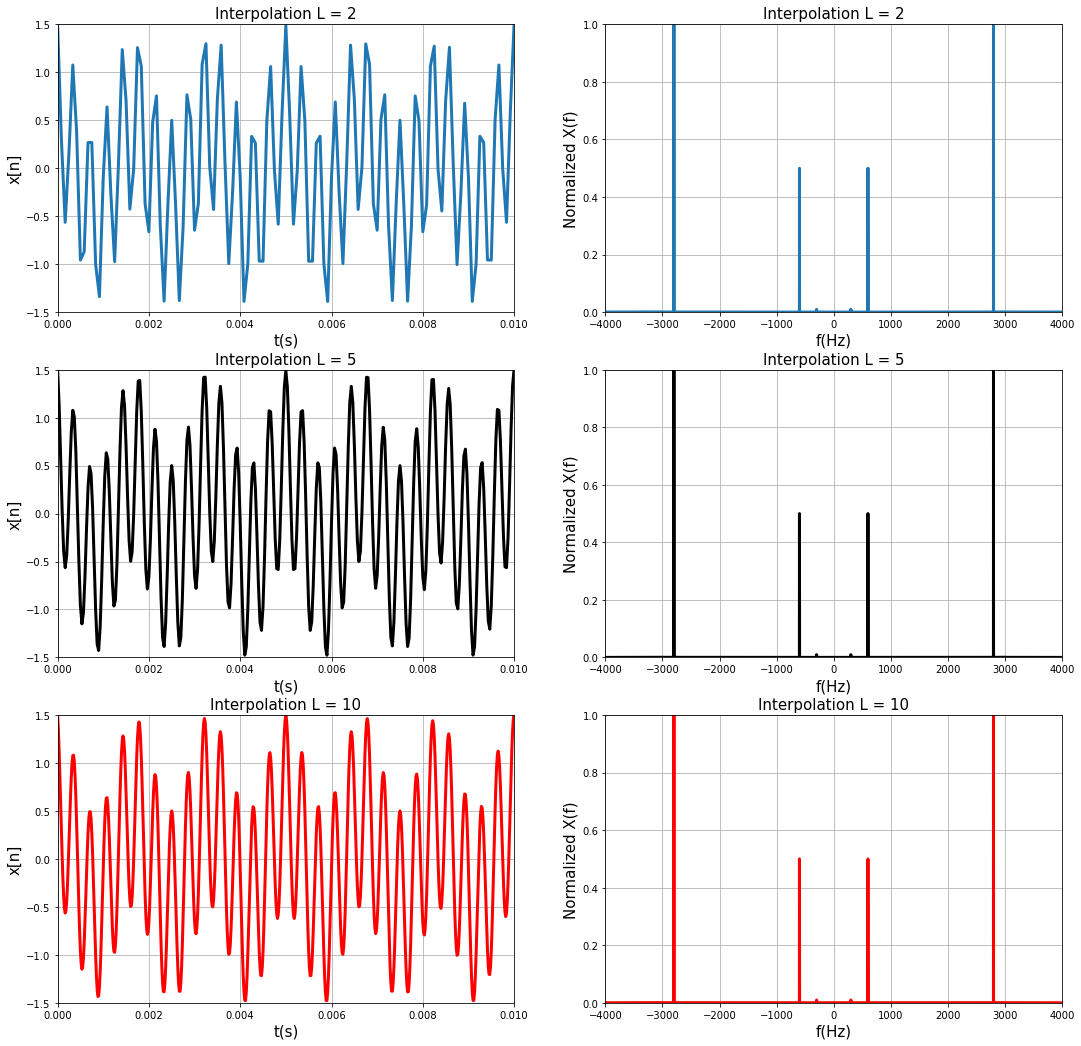

In [201]:
Fsi = 6000  #Frequency for the interpolation
To = 1/Fsi  #Sampling Period
ni = np.arange(0, 1, To)
xi = np.cos(2*np.pi*3200*ni) + 0.5*np.cos(2*np.pi*600*ni) + 0.01*np.cos(2*np.pi*300*ni)

L2 = 2        #Interpolation Factor
Ti2 = To/L2   #New Sampling period

ni2 = np.arange(0, 1, Ti2)
xi2 = np.zeros(len(ni2))

for i in range(len(ni)):
    xi2 += xi[i]*np.sinc(Fsi*ni2 - i)

ssi2 = abs(fft(xi2))   #Sampled spectrum
sfi2 = fftfreq(len(xi2), Ti2)   #Frequency span

L5 = 5        #Interpolation Factor
Ti5 = To/L5   #New Sampling period

ni5 = np.arange(0, 1, Ti5)
xi5 = np.zeros(len(ni5))

for i in range(len(ni)):
    xi5 += xi[i]*np.sinc(Fsi*ni5 - i)

ssi5 = abs(fft(xi5))   #Sampled spectrum
sfi5 = fftfreq(len(xi5), Ti5)   #Frequency span

L10 = 10        #Interpolation Factor
Ti10 = To/L10   #New Sampling period

ni10 = np.arange(0, 1, Ti10)
xi10 = np.zeros(len(ni10))

for i in range(len(ni)):
    xi10 += xi[i]*np.sinc(Fsi*ni10 - i)

ssi10 = abs(fft(xi10))   #Sampled spectrum
sfi10 = fftfreq(len(xi10), Ti10)   #Frequency span

figure4, ax4 = plt.subplots(3, 2, figsize = (18, 18))

ax4[0][0].plot(ni2, xi2, linewidth = 3)
ax4[0][0].set_xlim(0, 0.01)
ax4[0][0].set_ylim(-1.5, 1.5)
ax4[0][0].set_xlabel('t(s)', fontsize = 15)
ax4[0][0].set_ylabel('x[n]', fontsize = 15)
ax4[0][0].set_title('Interpolation L = 2', fontsize = 15)
ax4[0][0].grid(True)

ax4[0][1].plot(fftshift(sfi2), fftshift(ssi2)/ssi2.max(), linewidth = 3)
ax4[0][1].set_xlim(-4000, 4000)
ax4[0][1].set_ylim(-0, 1)
ax4[0][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[0][1].set_ylabel('Normalized X(f)', fontsize = 15)
ax4[0][1].set_title('Interpolation L = 2', fontsize = 15)
ax4[0][1].grid(True)

ax4[1][0].plot(ni5, xi5, 'k', linewidth = 3)
ax4[1][0].set_xlim(0, 0.01)
ax4[1][0].set_ylim(-1.5, 1.5)
ax4[1][0].set_xlabel('t(s)', fontsize = 15)
ax4[1][0].set_ylabel('x[n]', fontsize = 15)
ax4[1][0].set_title('Interpolation L = 5', fontsize = 15)
ax4[1][0].grid(True)

ax4[1][1].plot(fftshift(sfi5), fftshift(ssi5)/ssi5.max(), 'k', linewidth = 3)
ax4[1][1].set_xlim(-4000, 4000)
ax4[1][1].set_ylim(-0, 1)
ax4[1][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[1][1].set_ylabel('Normalized X(f)', fontsize = 15)
ax4[1][1].set_title('Interpolation L = 5', fontsize = 15)
ax4[1][1].grid(True)

ax4[2][0].plot(ni10, xi10, 'r', linewidth = 3)
ax4[2][0].set_xlim(0, 0.01)
ax4[2][0].set_ylim(-1.5, 1.5)
ax4[2][0].set_xlabel('t(s)', fontsize = 15)
ax4[2][0].set_ylabel('x[n]', fontsize = 15)
ax4[2][0].set_title('Interpolation L = 10', fontsize = 15)
ax4[2][0].grid(True)

ax4[2][1].plot(fftshift(sfi10), fftshift(ssi10)/ssi10.max(), 'r', linewidth = 3)
ax4[2][1].set_xlim(-4000, 4000)
ax4[2][1].set_ylim(-0, 1)
ax4[2][1].set_xlabel('f(Hz)', fontsize = 15)
ax4[2][1].set_ylabel('Normalized X(f)', fontsize = 15)
ax4[2][1].set_title('Interpolation L = 10', fontsize = 15)
ax4[2][1].grid(True)